<a href="https://colab.research.google.com/github/AllanHigorLP/Atividade_avaliativa-2.2-RNA/blob/main/PP2_2_2_Proposi%C3%A7%C3%A3o_e_Avalia%C3%A7%C3%A3o_de_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

# 1 - Abra a base de dados em questão

**Criando o diretório no Google Drive**

In [3]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


**Importando as bibliotecas**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neural_network import MLPClassifier #Importing MLPClassifier for classification.
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

**Abrindo o dataset**

In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covtype.csv')
print(df)

        Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
0            2596      51      3  ...            0            0           5
1            2590      56      2  ...            0            0           5
2            2804     139      9  ...            0            0           2
3            2785     155     18  ...            0            0           2
4            2595      45      2  ...            0            0           5
...           ...     ...    ...  ...          ...          ...         ...
581007       2396     153     20  ...            0            0           3
581008       2391     152     19  ...            0            0           3
581009       2386     159     17  ...            0            0           3
581010       2384     170     15  ...            0            0           3
581011       2383     165     13  ...            0            0           3

[581012 rows x 55 columns]


# 2 - Elimine todas as colunas relativas aos atributos categóricos

**Mostrando as colunas do dataset**

In [6]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

**Deletando os atributos categóricos**

In [7]:
df.drop(columns=['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'], inplace=True)

**Verificando se há inconsistencias após a eliminação das colunas**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Cover_Type                          581012 non-null  int64
dtypes: int64(11)
memory usage: 48.8 MB


**Visão geral do dataset**

In [9]:
df.head(-1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5
...,...,...,...,...,...,...,...,...,...,...,...
581006,2401,157,21,90,15,120,238,238,119,830,3
581007,2396,153,20,85,17,108,240,237,118,837,3
581008,2391,152,19,67,12,95,240,237,119,845,3
581009,2386,159,17,60,7,90,236,241,130,854,3


# 3 - Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X

In [10]:
Y = df['Cover_Type']
df.drop(["Cover_Type"],axis = 1,inplace=True)
X = df
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


# 4 - Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

# 5 - Efetue o escalonamento dos atributos 

In [12]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()


X_train_stand = (X_train - np.mean(X_train))/np.std(X_train)
X_test_stand = (X_test - np.mean(X_train))/np.std(X_train)

print(X_train_stand)
print(X_test_stand)

        Elevation    Aspect  ...  Hillshade_3pm  Horizontal_Distance_To_Fire_Points
68251    0.067396 -1.310952  ...       0.039238                            2.431335
434475   0.906621 -1.007260  ...      -1.213606                           -0.107524
271208  -2.332430 -0.489198  ...      -2.048836                           -0.570235
60473    0.863767  1.484799  ...       1.057174                            1.683589
422542  -0.739688  1.779559  ...       0.326348                            0.114758
...           ...       ...  ...            ...                                 ...
344880   0.017400  1.029262  ...       1.605294                            0.036128
234967  -3.289504  1.449071  ...       1.318184                           -0.900634
297808  -1.989598 -0.230167  ...      -0.169569                           -0.644329
163225   0.045969 -1.078717  ...      -0.169569                            0.091320
134255  -0.407569  1.672374  ...       0.482954                           -0

# Continuação

#5 - Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios

**5.1 - Utilize a função de ativação ReLU <br>
5.2 - Utilize o solver Adam <br>
5.3 - Imprima o passo a passo do treinamento <br>
5.4 - Utilize o número máximo de épocas igual a 300**

In [13]:
rede = MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=300,verbose=True)
rede.fit(X_train_stand,Y_train)

Iteration 1, loss = 0.97918812
Iteration 2, loss = 0.71338887
Iteration 3, loss = 0.68741590
Iteration 4, loss = 0.67761306
Iteration 5, loss = 0.67263421
Iteration 6, loss = 0.66972120
Iteration 7, loss = 0.66718165
Iteration 8, loss = 0.66530716
Iteration 9, loss = 0.66420156
Iteration 10, loss = 0.66334434
Iteration 11, loss = 0.66273184
Iteration 12, loss = 0.66226411
Iteration 13, loss = 0.66188534
Iteration 14, loss = 0.66149676
Iteration 15, loss = 0.66117357
Iteration 16, loss = 0.66094187
Iteration 17, loss = 0.66068185
Iteration 18, loss = 0.66041495
Iteration 19, loss = 0.66034946
Iteration 20, loss = 0.66000066
Iteration 21, loss = 0.65967132
Iteration 22, loss = 0.65927622
Iteration 23, loss = 0.65891681
Iteration 24, loss = 0.65851519
Iteration 25, loss = 0.65790283
Iteration 26, loss = 0.65718534
Iteration 27, loss = 0.65656640
Iteration 28, loss = 0.65615397
Iteration 29, loss = 0.65576958
Iteration 30, loss = 0.65541015
Iteration 31, loss = 0.65518056
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, verbose=True)

# 6 - Com o modelo em questão, após o treinamento, apresente:


**6.1 - Matriz de confusão para o conjunto de teste <br>
6.2 - Acurácia <br>
6.3 - F-Score <br>
6.4 - Precisão <br>
6.5 - Revocação**

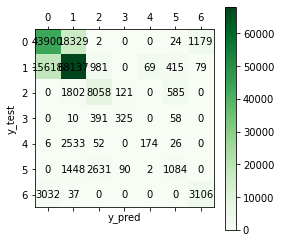

In [14]:
y_pred = rede.predict(X_test_stand)

conf_matrix = confusion_matrix(y_pred, Y_test)
plt.matshow(conf_matrix, cmap=plt.cm.Greens)

for (m, n), value in np.ndenumerate(conf_matrix):
    plt.text(m, n, f"{value}", va="center", ha="center")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.colorbar()
plt.plot()
plt.show()

In [15]:
acuracia = accuracy_score(y_pred, Y_test)
fscore = f1_score(y_pred, Y_test, average='weighted')
precisao = precision_score(y_pred, Y_test, average='weighted')
revocacao = recall_score(y_pred, Y_test, average='weighted')

print("Acurácia {:.3f}".format(acuracia))
print("F1-Score: {:.3f}".format(fscore))
print("Precisão: {:.3f}".format(precisao))
print("Revocação: {:.3f}".format(revocacao))

Acurácia 0.716
F1-Score: 0.726
Precisão: 0.741
Revocação: 0.716


# 7 - Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes

**7.1 - Cada uma destas repetições deve ser feita com uma nova partição Holdout <br>
7.2 - Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino**

In [ ]:
acuracia = []
fscore = []


for i in range(15):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
    
    X_train_stand = X_train.copy()
    X_test_stand = X_test.copy()
    X_train_stand = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_stand = (X_test - np.mean(X_train))/np.std(X_train)

    y_pred = rede.predict(X_test_stand)
    rede = MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=300,verbose=False)
    rede.fit(X_train_stand,Y_train)
    acuracia.append(accuracy_score(y_pred, Y_test))
    fscore.append(f1_score(y_pred, Y_test, average='weighted'))

dp = np.std(fscore)
media = np.mean(fscore)
dp_a = np.std(acuracia)
media_a = np.mean(acuracia)

print("Desvio padrão Acurácia:", dp_a, "\nMédia Acurácia:", media_a,"\nDesvio padrão F-Score:", dp, "\nMédia F-score:", media) 

Desvio padrão Acurácia: 0.0021960659728800396 
Média Acurácia: 0.7182719080839607 
Desvio padrão F-Score: 0.00219594454810365 
Média F-score: 0.7278876574889274


# 8 - Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD

**8.1 - Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino**

In [ ]:
acuraciaSGD = []
fscoreSGD = []

for i in range(15):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

    X_train_stand = X_train.copy()
    X_test_stand = X_test.copy()
    X_train_stand = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_stand = (X_test - np.mean(X_train))/np.std(X_train)

    
    rede2 = MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='sgd',max_iter=300,verbose=False)
    rede2.fit(X_train_stand,Y_train)
  
    y_pred = rede2.predict(X_test_stand)
    acuraciaSGD.append(accuracy_score(y_pred, Y_test))
    fscoreSGD.append(f1_score(y_pred, Y_test, average='weighted'))

dp_f = np.std(fscoreSGD)
media_f = np.mean(fscoreSGD)
dp_a = np.std(acuraciaSGD)
media_a = np.mean(acuraciaSGD)

print("Desvio Padrão Acurácia:", dp_a, "\nMédia Acurácia:", media_a,"\nDesvio Padrão F-Score:", dp_f, "\nMédia F-Score:", media_f) 

Desvio Padrão Acurácia: 0.0027142951537368503 
Média Acurácia: 0.7151780796768862 
Desvio Padrão F-Score: 0.002444865678778554 
Média F-Score: 0.7260423674941989


 # 9 - Houve influência da escolha do otimizador no desempenho da rede?

**R: Houve uma influência pouco significativa do otimizador SGD em relação ao otimizador ADAM, pois as médias e desvios padrões de acurácia e F-Score de ambos ficaram com valores muito próximos. Entretanto, o otimizador SGD obteve um tempo de execução de 38 minutos e o ADAM de 29 minutos, onde notamos que o tempo de excução dos otimizadores influência no desempenho da rede.**

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

**1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha**

1. Hiperparâmetro solver: Adam, número de épocas: 100, número de camadas ocultas: 1, função de ativação: relu, número de neurônios: 10;
2. Hiperparâmetro solver: Adam, número de épocas: 100, número de camadas ocultas: 2, função de ativação: relu, número de neurônios: 15;
3. Hiperparâmetro solver: Adam, número de épocas: 150, número de camadas ocultas: 1, função de ativação: logistic, número de neurônios: 8;
4. Hiperparâmetro solver: Adam, número de épocas: 200, número de camadas ocultas: 1, função de ativação: relu, número de neurônios: 18;
5. Hiperparâmetro solver: Adam, número de épocas: 200, número de camadas ocultas: 2, função de ativação: logistic, número de neurônios: 20;
6. Hiperparâmetro solver: SGD, número de épocas: 100, número de camadas ocultas: 1, função de ativação: relu, número de neurônios: 5;
7. Hiperparâmetro solver: SGD, número de épocas: 100, número de camadas ocultas: 2, função de ativação: relu, número de neurônios: 13;
8. Hiperparâmetro solver: SGD, número de épocas: 150, número de camadas ocultas: 1, função de ativação: logistic, número de neurônios: 17;
9. Hiperparâmetro solver: SGD, número de épocas: 200, número de camadas ocultas: 1, função de ativação: relu, número de neurônios: 9;
10. Hiperparâmetro solver: SGD, número de épocas: 200, número de camadas ocultas: 2, função de ativação: logistic, número de neurônios: 30;

1. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=100,verbose=False)
2. MLPClassifier(hidden_layer_sizes=(15,2),activation='relu',solver='adam',max_iter=100,verbose=False)
3. MLPClassifier(hidden_layer_sizes=(8,),activation='logistic',solver='adam',max_iter=150,verbose=False)
4. MLPClassifier(hidden_layer_sizes=(18,),activation='relu',solver='adam',max_iter=200,verbose=False)
5. MLPClassifier(hidden_layer_sizes=(20,2),activation='logistic',solver='adam',max_iter=200,verbose=False)
6. MLPClassifier(hidden_layer_sizes=(5,),activation='relu',solver='sgd',max_iter=100,verbose=False)
7. MLPClassifier(hidden_layer_sizes=(13,2),activation='relu',solver='sgd',max_iter=100,verbose=False)
8. MLPClassifier(hidden_layer_sizes=(17,),activation='logistic',solver='sgd',max_iter=150,verbose=False)
9. MLPClassifier(hidden_layer_sizes=(9,),activation='relu',solver='sgd',max_iter=200,verbose=False)
10. MLPClassifier(hidden_layer_sizes=(30,2),activation='logistic',solver='sgd',max_iter=200,verbose=False)

In [16]:
def arquitetura(hidden_layer,layer, activ, solv, iter):
  acuracia = []
  fscore = []
  
  for i in range(15):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
    
    X_train_stand = X_train.copy()
    X_test_stand = X_test.copy()
    X_train_stand = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_stand = (X_test - np.mean(X_train))/np.std(X_train)

   
    if(hidden_layer == 1):
      rede3 = MLPClassifier(hidden_layer_sizes=(layer,),activation=activ,solver=solv,max_iter=iter,verbose=False)
    else:
      rede3 = MLPClassifier(hidden_layer_sizes=(layer,2),activation=activ,solver=solv,max_iter=iter,verbose=False)
    rede3.fit(X_train_stand,Y_train)
     
    y_pred = rede3.predict(X_test_stand)

    acuracia.append(accuracy_score(y_pred, Y_test))
    fscore.append(f1_score(y_pred, Y_test, average='weighted'))

  dp_f = np.std(fscore)
  media_f = np.mean(fscore)
  dp_a = np.std(acuracia)
  media_a = np.mean(acuracia)

  print("Desvio Padrão Acurácia:", dp_a, "\nMédia Acurácia:", media_a,"\nDesvio Padrão F-Score:", dp_f, "\nMédia F-Score:", media_f) 
  return media_f, media_a

In [ ]:
FScore_arqs = []
Acuracia_arqs = []

In [ ]:
# 1. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 10, 'relu', 'adam', 100)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.0031297432231122656 
Média Acurácia: 0.718549966342329 
Desvio Padrão F-Score: 0.0032068952813825375 
Média F-Score: 0.7284409873895787


In [ ]:
# 2. MLPClassifier(hidden_layer_sizes=(15,2),activation='relu',solver='adam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(2, 15, 'relu', 'adam', 100)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.002380240872014125 
Média Acurácia: 0.7210341319380701 
Desvio Padrão F-Score: 0.0037090172934870266 
Média F-Score: 0.7336377948793722


/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 3. MLPClassifier(hidden_layer_sizes=(8,),activation='logistic',solver='adam',max_iter=150,verbose=False)
media_f, media_a = arquitetura(1, 8, 'logistic', 'adam', 150)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

Desvio Padrão Acurácia: 0.0018570509961679364 
Média Acurácia: 0.7131907472002937 
Desvio Padrão F-Score: 0.0018432768817629296 
Média F-Score: 0.7245234063553949


In [ ]:
# 4. MLPClassifier(hidden_layer_sizes=(18,),activation='relu',solver='adam',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 18, 'relu', 'adam', 200)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

Desvio Padrão Acurácia: 0.0013060527528066025 
Média Acurácia: 0.7307998286518573 
Desvio Padrão F-Score: 0.001759732093570076 
Média F-Score: 0.7378688005452879


In [ ]:
# 5. MLPClassifier(hidden_layer_sizes=(20,2),activation='logistic',solver='adam',max_iter=200,verbose=False)
media_f, media_a = arquitetura(2, 20, 'logistic', 'adam', 200)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.002650779555371101 
Média Acurácia: 0.7388818768741203 
Desvio Padrão F-Score: 0.0028474806334959405 
Média F-Score: 0.7513327085891925


In [ ]:
# 6. MLPClassifier(hidden_layer_sizes=(5,),activation='relu',solver='sgd',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 5, 'relu', 'sgd', 100)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.0030568620404942226 
Média Acurácia: 0.7027312434979501 
Desvio Padrão F-Score: 0.003587186135683673 
Média F-Score: 0.7175716927404461


/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 7. MLPClassifier(hidden_layer_sizes=(13,2),activation='relu',solver='sgd',max_iter=100,verbose=False)
media_f, media_a = arquitetura(2, 13, 'relu', 'sgd', 100)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.002803642030792968 
Média Acurácia: 0.7166112080044059 
Desvio Padrão F-Score: 0.0036145873208375664 
Média F-Score: 0.7327329617316776


/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 8. MLPClassifier(hidden_layer_sizes=(17,),activation='logistic',solver='sgd',max_iter=150,verbose=False)
media_f, media_a = arquitetura(1, 17, 'relu', 'sgd', 150)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.0034174875903233183 
Média Acurácia: 0.7250474267180711 
Desvio Padrão F-Score: 0.003192106715028556 
Média F-Score: 0.7342372521160385


/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 9. MLPClassifier(hidden_layer_sizes=(9,),activation='relu',solver='sgd',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 9, 'relu', 'sgd', 200)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

Desvio Padrão Acurácia: 0.0033153496371343405 
Média Acurácia: 0.7119672143687656 
Desvio Padrão F-Score: 0.0027423978885138087 
Média F-Score: 0.7235489214629366


In [ ]:
# 10. MLPClassifier(hidden_layer_sizes=(30,2),activation='logistic',solver='sgd',max_iter=200,verbose=False)
media_f, media_a = arquitetura(2, 30, 'logistic', 'sgd', 200)
FScore_arqs.append(media_f)
Acuracia_arqs.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.0016886084758260427 
Média Acurácia: 0.7124625175937825 
Desvio Padrão F-Score: 0.0015821773544336722 
Média F-Score: 0.7353989527615276


/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [17]:
Ni = rede.n_features_in_
No = rede.n_outputs_

alpha1 = 0.5
alpha2 = 2
alpha3 = 3

Nh1 = round(alpha1*np.sqrt(Ni*No))
Nh2 = round(alpha2*np.sqrt(Ni*No))
Nh3 = round(alpha3*np.sqrt(Ni*No))


In [18]:
FScore_arqs2 = []
Acuracia_arqs2 = []


 **Alpha 0.5**
1.   MLPClassifier(hidden_layer_sizes=(4,),activation='relu',solver='adam',max_iter=100,verbose=False)
2.   MLPClassifier(hidden_layer_sizes=(4,),activation='logistic',solver='SGD',max_iter=150,verbose=False)
3.   MLPClassifier(hidden_layer_sizes=(4,),activation='relu',solver='adam',max_iter=200,verbose=False)
4.  MLPClassifier(hidden_layer_sizes=(4,),activation='logistic',solver='SGD',max_iter=100,verbose=False)
5.  MLPClassifier(hidden_layer_sizes=(4,),activation='relu',solver='adam',max_iter=150,verbose=False)
6.  MLPClassifier(hidden_layer_sizes=(2,2),activation='logistic',solver='SGD',max_iter=200,verbose=False)
7.  MLPClassifier(hidden_layer_sizes=(2,2),activation='relu',solver='adam',max_iter=100,verbose=False)
8.  MLPClassifier(hidden_layer_sizes=(2,2),activation='logistic',solver='SGD',max_iter=150,verbose=False)
9.  MLPClassifier(hidden_layer_sizes=(2,2),activation='relu',solver='adam',max_iter=200,verbose=False)
10. MLPClassifier(hidden_layer_sizes=(2,2),activation='logistic',solver='SGD',max_iter=100,verbose=False)



In [ ]:
# 1. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.0026846809807786077 
Média Acurácia: 0.7018156018603513 
Desvio Padrão F-Score: 0.002771783623912404 
Média F-Score: 0.7164427124196977


In [20]:
# 2. MLPClassifier(hidden_layer_sizes=(10,),activation='logistic',solver='SGD',max_iter=150,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'sgd', 150)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Desvio Padrão Acurácia: 0.0015051465343305249 
Média Acurácia: 0.6988705556575485 
Desvio Padrão F-Score: 0.002381613223806759 
Média F-Score: 0.7184304693099416


In [ ]:
# 3. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 200)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

Desvio Padrão Acurácia: 0.0027024609284505723 
Média Acurácia: 0.6994905452542685 
Desvio Padrão F-Score: 0.002952758873151467 
Média F-Score: 0.7136145773061793


In [21]:
# 4. MLPClassifier(hidden_layer_sizes=(10,),activation='logistic',solver='adSGDam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'sgd', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.0012835366142793718 
Média Acurácia: 0.6980337035677131 
Desvio Padrão F-Score: 0.0025915097636930806 
Média F-Score: 0.7198646659190439


In [ ]:
# 5. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=150,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 150)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

Desvio Padrão Acurácia: 0.0023974810898361775 
Média Acurácia: 0.7033137506884523 
Desvio Padrão F-Score: 0.0023999152242565724 
Média F-Score: 0.7176166213822908


In [22]:
# 6. MLPClassifier(hidden_layer_sizes=(10,),activation='logistic',solver='SGD',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'sgd', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.0016670878399011506 
Média Acurácia: 0.6981373538951104 
Desvio Padrão F-Score: 0.0016921935629443017 
Média F-Score: 0.7197300423902603


In [ ]:
# 7. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.0039253936000475075 
Média Acurácia: 0.7021280827366746 
Desvio Padrão F-Score: 0.0038991495988220026 
Média F-Score: 0.7165276397772263


In [23]:
# 8. MLPClassifier(hidden_layer_sizes=(10,),activation='logistic',solver='SGD',max_iter=150,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'sgd', 150)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Desvio Padrão Acurácia: 0.0015937247595775497 
Média Acurácia: 0.6982803989963896 
Desvio Padrão F-Score: 0.0020200700487499642 
Média F-Score: 0.7181835631457602


In [ ]:
# 9. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 200)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

Desvio Padrão Acurácia: 0.003355618064219651 
Média Acurácia: 0.7020489107153786 
Desvio Padrão F-Score: 0.0031617716876645783 
Média F-Score: 0.7166348348040705


In [ ]:
# 10. MLPClassifier(hidden_layer_sizes=(10,),activation='logistic',solver='SGD',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'SGD', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

**Alpha 2**
1.   MLPClassifier(hidden_layer_sizes=(16,),activation='relu',solver='adam',max_iter=100,verbose=False)
2.   MLPClassifier(hidden_layer_sizes=(16,),activation='relu',solver='SGD',max_iter=100,verbose=False)
3.   MLPClassifier(hidden_layer_sizes=(16,),activation='logistic',solver='adam',max_iter=150,verbose=False)
4.  MLPClassifier(hidden_layer_sizes=(16,),activation='relu',solver='SGD',max_iter=200,verbose=False)
5.  MLPClassifier(hidden_layer_sizes=(16,),activation='logistic',solver='adam',max_iter=200,verbose=False)
6.  MLPClassifier(hidden_layer_sizes=(8,2),activation='relu',solver='SGD',max_iter=100,verbose=False)
7.  MLPClassifier(hidden_layer_sizes=(8,2),activation='relu',solver='adam',max_iter=100,verbose=False)
8.  MLPClassifier(hidden_layer_sizes=(8,2),activation='logistic',solver='SGD',max_iter=150,verbose=False)
9.  MLPClassifier(hidden_layer_sizes=(8,2),activation='relu',solver='adam',max_iter=100,verbose=False)
10. MLPClassifier(hidden_layer_sizes=(8,2),activation='logistic',solver='SGD',max_iter=100,verbose=False)


In [ ]:
# 1. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

Desvio Padrão Acurácia: 0.003754319558293256 
Média Acurácia: 0.7005786824551742 
Desvio Padrão F-Score: 0.0034425158623880747 
Média F-Score: 0.7147772009768608


In [24]:
# 2. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='SGD',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'sgd', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.001480581475649442 
Média Acurácia: 0.6979595037023437 
Desvio Padrão F-Score: 0.0019158120752484915 
Média F-Score: 0.7190991839667905


In [ ]:
# 3. MLPClassifier(hidden_layer_sizes=(10,),activation='logistic',solver='adam',max_iter=150,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 150)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

Desvio Padrão Acurácia: 0.004395674914818868 
Média Acurácia: 0.6997074077473838 
Desvio Padrão F-Score: 0.0037827331660121332 
Média F-Score: 0.7144345697053864


In [25]:
# 4. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adSGDam',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'sgd', 200)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

Desvio Padrão Acurácia: 0.0016027304105878735 
Média Acurácia: 0.6988158619423536 
Desvio Padrão F-Score: 0.002572551402284052 
Média F-Score: 0.7188206792537234


In [ ]:
# 5. MLPClassifier(hidden_layer_sizes=(10,),activation='logistic',solver='adam',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

Desvio Padrão Acurácia: 0.003330780680980354 
Média Acurácia: 0.7018538492136345 
Desvio Padrão F-Score: 0.0026421078971209057 
Média F-Score: 0.7161965554894917


In [26]:
# 6. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='SGD',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'sgd', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.0020689229021360733 
Média Acurácia: 0.6968354139893519 
Desvio Padrão F-Score: 0.0014819578778320257 
Média F-Score: 0.7189550844554377


In [ ]:
# 7. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.004355134336501288 
Média Acurácia: 0.7017333700507924 
Desvio Padrão F-Score: 0.004056461475189312 
Média F-Score: 0.715362605045117


In [27]:
# 8. MLPClassifier(hidden_layer_sizes=(10,),activation='logistic',solver='SGD',max_iter=150,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'sgd', 150)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Desvio Padrão Acurácia: 0.0009264469047169734 
Média Acurácia: 0.6978420843277646 
Desvio Padrão F-Score: 0.0015716276522397 
Média F-Score: 0.7167682973307415


In [ ]:
# 9. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'relu', 'adam', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

Desvio Padrão Acurácia: 0.003687514705609679 
Média Acurácia: 0.7005913040817576 
Desvio Padrão F-Score: 0.002719570402105005 
Média F-Score: 0.715303805282409


In [28]:
# 10. MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='SGD',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 4, 'logistic', 'sgd', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.0013902528335180482 
Média Acurácia: 0.6969562756257267 
Desvio Padrão F-Score: 0.002226615241863175 
Média F-Score: 0.7190170771204389


**Alpha 3**
1.   MLPClassifier(hidden_layer_sizes=(24,),activation='relu',solver='adam',max_iter=100,verbose=False)
2.   MLPClassifier(hidden_layer_sizes=(24,),activation='relu',solver='SGD',max_iter=100,verbose=False)
3.   MLPClassifier(hidden_layer_sizes=(24,),activation='logistic',solver='adam',max_iter=150,verbose=False)
4.  MLPClassifier(hidden_layer_sizes=(24,),activation='relu',solver='SGD',max_iter=200,verbose=False)
5.  MLPClassifier(hidden_layer_sizes=(24,),activation='logistic',solver='adam',max_iter=200,verbose=False)
6.  MLPClassifier(hidden_layer_sizes=(12,2),activation='relu',solver='SGD',max_iter=100,verbose=False)
7.  MLPClassifier(hidden_layer_sizes=(12,2),activation='relu',solver='adam',max_iter=100,verbose=False)
8.  MLPClassifier(hidden_layer_sizes=(12,2),activation='logistic',solver='SGD',max_iter=150,verbose=False)
9.  MLPClassifier(hidden_layer_sizes=(12,2),activation='relu',solver='SGD',max_iter=200,verbose=False)
10. MLPClassifier(hidden_layer_sizes=(12,2),activation='relu',solver='adam',max_iter=200,verbose=False)


In [ ]:
# 1. MLPClassifier(hidden_layer_sizes=(24,),activation='relu',solver='adam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 25, 'relu', 'adam', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.002635626363566987 
Média Acurácia: 0.7413759867817148 
Desvio Padrão F-Score: 0.0031541770427993628 
Média F-Score: 0.7479268244118178


In [29]:
# 2. MLPClassifier(hidden_layer_sizes=(24,),activation='relu',solver='SGD',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 25, 'relu', 'sgd', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.002271087580615002 
Média Acurácia: 0.7297981304693716 
Desvio Padrão F-Score: 0.0021364769934328538 
Média F-Score: 0.7388107005162196


In [ ]:
# 3. MLPClassifier(hidden_layer_sizes=(24,),activation='logistic',solver='adam',max_iter=150,verbose=False)
media_f, media_a = arquitetura(1, 25, 'logistic', 'adam', 150)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.003356681292865782 
Média Acurácia: 0.7470932011504803 
Desvio Padrão F-Score: 0.0034084728473328515 
Média F-Score: 0.7539163897665984


In [30]:
# 4. MLPClassifier(hidden_layer_sizes=(24,),activation='relu',solver='SGD',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 25, 'relu', 'sgd', 200)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.0020521655095380354 
Média Acurácia: 0.7356813383513859 
Desvio Padrão F-Score: 0.0021250637589542033 
Média F-Score: 0.7439780960316463


In [ ]:
# 5. MLPClassifier(hidden_layer_sizes=(24,),activation='logistic',solver='adam',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 25, 'logistic', 'adam', 200)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.0038430670318996456 
Média Acurácia: 0.7487917661097853 
Desvio Padrão F-Score: 0.003815039797196513 
Média F-Score: 0.7557262400293626


/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:

# 6. MLPClassifier(hidden_layer_sizes=(12,2),activation='relu',solver='SGD',max_iter=100,verbose=False)
media_f, media_a = arquitetura(1, 25, 'relu', 'sgd', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.0023624847396919463 
Média Acurácia: 0.7294890918548437 
Desvio Padrão F-Score: 0.0024132090663712604 
Média F-Score: 0.7383430311892573


In [ ]:

# 7. MLPClassifier(hidden_layer_sizes=(12,2),activation='relu',solver='adam',max_iter=100,verbose=False)
media_f, media_a = arquitetura(2, 12, 'relu', 'adam', 100)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.010162174146160666 
Média Acurácia: 0.7148621565387676 
Desvio Padrão F-Score: 0.006319751316495101 
Média F-Score: 0.7281525372435068


/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
# 8. MLPClassifier(hidden_layer_sizes=(12,2),activation='logistic',solver='SGD',max_iter=150,verbose=False)
media_f, media_a = arquitetura(1, 25, 'logistic', 'sgd', 150)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.001242111637629921 
Média Acurácia: 0.7177276482467414 
Desvio Padrão F-Score: 0.001454641438689158 
Média F-Score: 0.7313448652842781


In [21]:
# 9. MLPClassifier(hidden_layer_sizes=(12,2),activation='relu',solver='SGD',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 25, 'relu', 'sgd', 200)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Desvio Padrão Acurácia: 0.0028173327029589004 
Média Acurácia: 0.7367763600758829 
Desvio Padrão F-Score: 0.0029300585637789815 
Média F-Score: 0.7447348818150861


In [ ]:
# 10. MLPClassifier(hidden_layer_sizes=(12,2),activation='relu',solver='adam',max_iter=200,verbose=False)
media_f, media_a = arquitetura(1, 25, 'relu', 'adam', 200)
FScore_arqs2.append(media_f)
Acuracia_arqs2.append(media_a)

/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/elloa/.conda/envs/gpr-ufcg/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Desvio Padrão Acurácia: 0.0027362062978545684 
Média Acurácia: 0.7407777981763661 
Desvio Padrão F-Score: 0.0032705913008260422 
Média F-Score: 0.7472630652502832


## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?